## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [4]:
print(f"В количественных данных есть пропуски? Ответ: {X.isnull().values.any()}")

if not X.select_dtypes(include=['object']).empty:
    print('Среди этих признаков есть категориальные')
else:
    print("Нет, категориальных переменных нет, ничего кодировать не надо!")





В количественных данных есть пропуски? Ответ: False
Нет, категориальных переменных нет, ничего кодировать не надо!


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(30)
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, stratify = y)

Используйте аргумент stratify при разбиении. Почему это важно?


Вполне может быть такое, что в нашем таргете классы могут быть представленны неравномерно (например, к какому-то классу относится только 1 элемент, а к
какому-то другому - 100), поэтому важно использоать 'stratify', так как он сохраняет пропорции классов при делении на тестовую и тренировочную выборки

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

X_train_only_two = X_train[['alcohol', 'magnesium']]
X_test_only_two = X_test[['alcohol', 'magnesium']]

normalizer = StandardScaler()
X_train_only_two_norm = normalizer.fit_transform(X_train_only_two)
X_test_only_two_norm = normalizer.transform(X_test_only_two)

sosedi_amount = [1, 3, 5, 10, 15, 25]
models = []
for i in sosedi_amount:
    knn = KNeighborsClassifier(n_neighbors=i, p = 2)
    knn.fit(X_train_only_two_norm, y_train)
    models.append(knn)

    X_train_prediction = knn.predict(X_train_only_two_norm)
    X_test_prediction = knn.predict(X_test_only_two_norm)

    train_accuracy = accuracy_score(y_train, X_train_prediction)
    test_accuracy = accuracy_score(y_test, X_test_prediction)

    print(f"Число соседей: {i}")
    print(f"Доля правильных ответов на тренировочной выборке: {train_accuracy:.4f}")
    print(f"Доля правильных ответов на тестовой выборке: {test_accuracy:.4f}")
print(models)



Число соседей: 1
Доля правильных ответов на тренировочной выборке: 1.0000
Доля правильных ответов на тестовой выборке: 0.6210
Число соседей: 3
Доля правильных ответов на тренировочной выборке: 0.7778
Доля правильных ответов на тестовой выборке: 0.5887
Число соседей: 5
Доля правильных ответов на тренировочной выборке: 0.8148
Доля правильных ответов на тестовой выборке: 0.6290
Число соседей: 10
Доля правильных ответов на тренировочной выборке: 0.6852
Доля правильных ответов на тестовой выборке: 0.7177
Число соседей: 15
Доля правильных ответов на тренировочной выборке: 0.7037
Доля правильных ответов на тестовой выборке: 0.6371
Число соседей: 25
Доля правильных ответов на тренировочной выборке: 0.7407
Доля правильных ответов на тестовой выборке: 0.6855
[KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=15), KNeighborsClassifier(n_neighbors=25)]


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

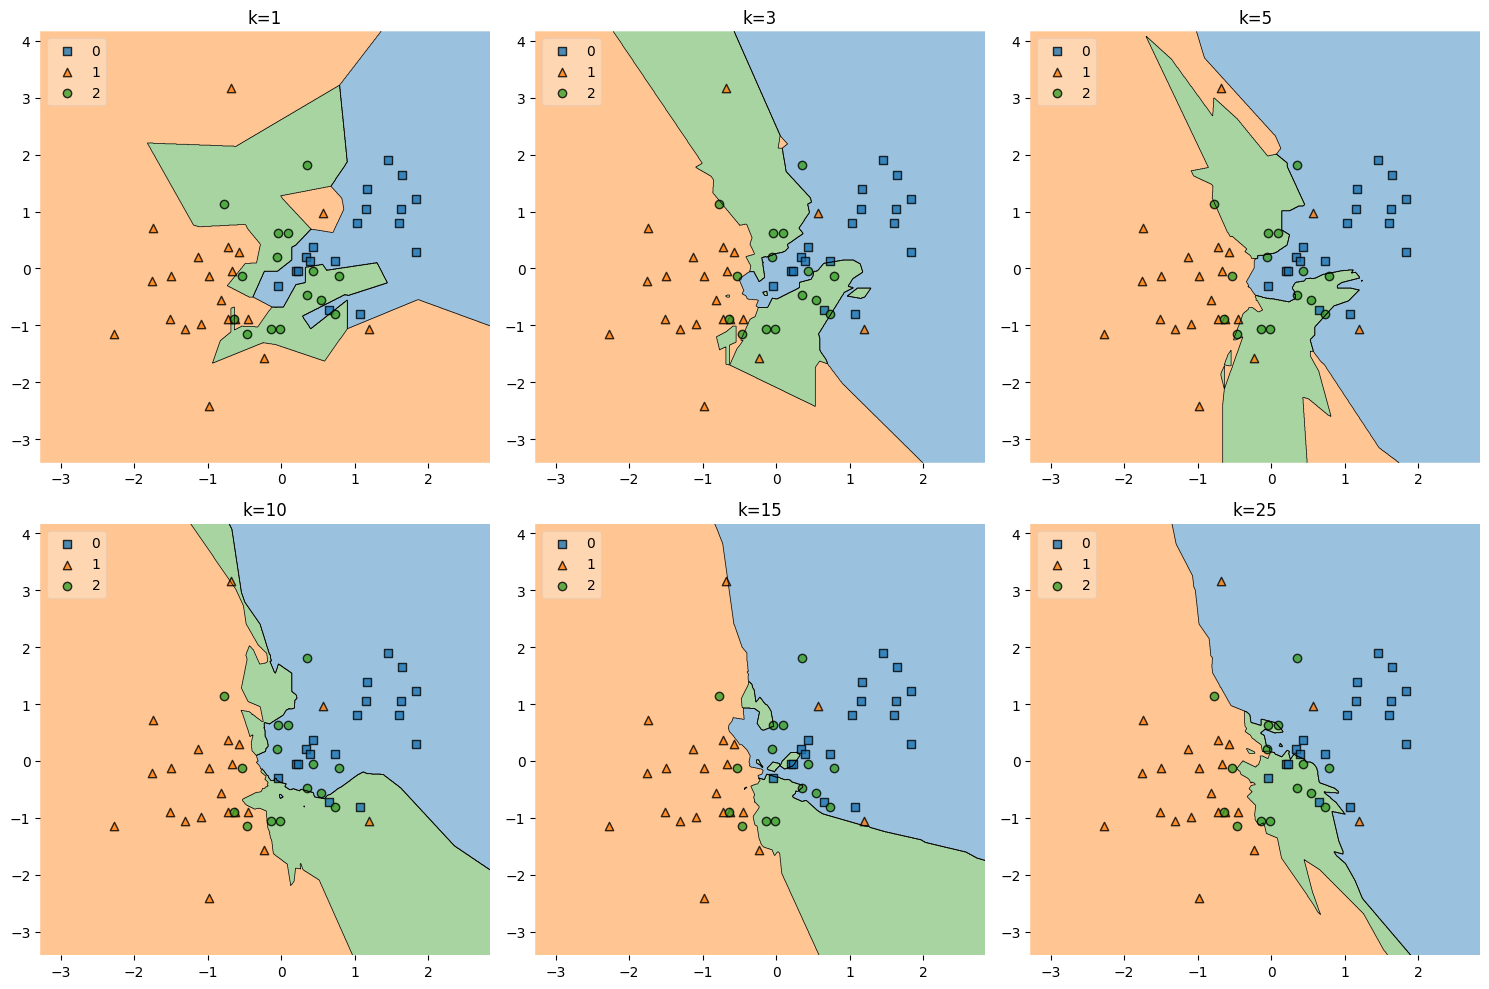

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Создание сетки графиков
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15, 10))
labels = ['k=1', 'k=3', 'k=5', 'k=10', 'k=15', 'k=25']

# Построение графиков решающих поверхностей
for clf, lab, grd in zip(models, labels, itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_only_two_norm, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

1.) В первую очерь, хочется отметить, что при малом числе соседей (k=1, k=3 и k=5) модель демонстрирует ОООООчень высокую точность на тренировочой выборке, однако низкую на тестовой выборке (при абсолютно большом разбросе в seed.random()), что потенциально может говорить о переобучении модели.

В данном случае решающие поверхности сильно извилисты и подстраиваются под отдельные точки данных, что вновь может указывать на переобучение. (Например, на графике  k=1 можно заметить 1 красный объект, которые находится на малом островке в гуще между синими и зелеными объектами)

2.) Во-вторых, в сулчае с большой выборкой (k=15 и k=25) модель наоборот показывает очень низкие результаты, что вполне ожидаемо, т.к чем больше число соседей, тем менее сувствительной становится модель по отношению к локальным особенностям, не захватывая важные закономерности в локальных частях данных.

Решающие поверхности становятся слишком гладкими и могут упрощать структуру данных, что приводит к увеличению недообучения. (Например, при k=15 и k=25 можно заметить большое кол-во зеленых объектов, которые, на самом деле, классифицированы неверно)


3.) Таким образом модель с k=10 показала давольно таки хорошие результаты на на тестовой выбрке (и примерно одинаковые с тренировочной), поэтоу я думаю, что где-то в окрестности этой точки и лежит оптимальной для нас k. Можно попробовать как-то поиграться с этим k и попробовать соседние значения, главное - чем выше результат на тестовой выборке, тем больше нам подходит k

Решающие поверхности более гладкие, но всё ещё хорошо адаптируются к распределению классов в данных. (Можно заметить, что ошибки есть, но их сильно меньше, чем в предыдущих случаях)

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

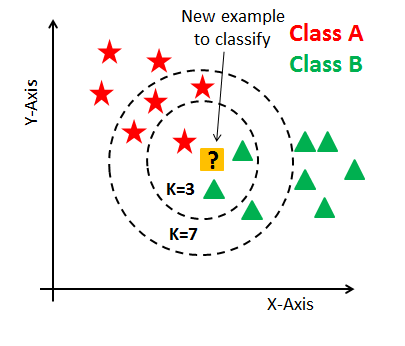

In [51]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_prediction = []
        for x in X:
            distances_between_k = [self.count_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances_between_k)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            y_prediction.append(most_common[0][0])
        return np.array(y_prediction)

    def count_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))


In [52]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [53]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [14]:
data = pd.read_csv('diamonds.csv')
data.head(8)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [15]:
#1.) Столбец с названием "Unnamed: 0",очевидно, бесполезен! Его можно удалить.
data.drop(data.columns[0], axis=1, inplace=True)

#2.) Теперь проверим данные на пропуски
if data.isnull().values.any():
  print('Пропуски есть, сейчас удалю!')
  data.dropna(inplace = True)
else:
  print("Пропусков нет!")


Пропусков нет!


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [16]:
data.corr()

<ipython-input-16-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

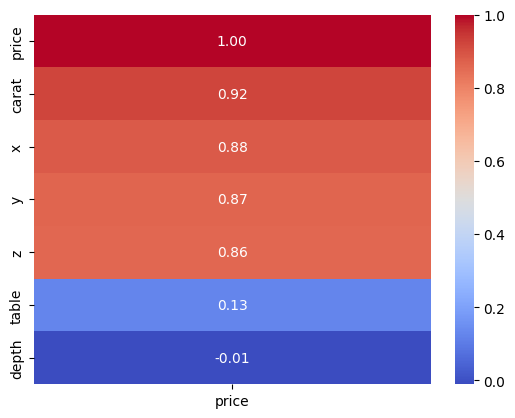

In [17]:
import seaborn as sns

corr_matrix = data.select_dtypes(exclude = 'object').corr()['price'].sort_values(ascending=False)
price_corr = corr_matrix.to_frame()

sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt='.2f')

Самая большая корреляция у цены с кол-во карат и с x, y, z (размерами украшения), что, в целом, было ожидаемо

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [18]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['cut', 'color', 'clarity']
encoder = OneHotEncoder(sparse=False)

encoded_categorical = encoder.fit_transform(data[categorical_columns])

encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

data = pd.concat([data.drop(columns=categorical_columns), encoded_categorical_df], axis=1)
data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [30]:
from sklearn.model_selection import train_test_split
X1 = data.drop('price', axis = 1)
y1 = data['price']

np.random.seed(42)
X1_test, X1_train, y1_test, y1_train = train_test_split(X1, y1, test_size=0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [31]:
from sklearn.preprocessing import StandardScaler

vesh_test = ['carat',	'depth',	'table',	'x',	'y',	'z']

scaller = StandardScaler()
X1_train[vesh_test] = scaller.fit_transform(X1_train[vesh_test])
X1_test[vesh_test] = scaller.fit_transform(X1_test[vesh_test])
X1_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,-1.177152,0.235906,-0.642780,-1.562934,-1.523982,-1.536090,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50052,-0.454302,-1.220570,-0.198865,-0.251053,-0.269090,-0.394598,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41645,-0.836987,0.235906,-1.086695,-0.857909,-0.870024,-0.842525,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42377,-0.773206,-0.665722,-0.198865,-0.715120,-0.737465,-0.799177,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17244,1.607947,0.374617,-1.086695,1.533821,1.454177,1.556054,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,-0.815727,-0.388298,0.688966,-0.840061,-0.799326,-0.856974,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12564,0.566192,0.860109,-1.086695,0.686006,0.632311,0.790242,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24786,1.522906,-0.665722,1.132881,1.515972,1.463014,1.397112,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1332,-0.177918,-1.983486,1.576796,0.070225,0.155099,-0.134511,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression_model = LinearRegression()
regression_model.fit(X1_train, y1_train)

y1_train_prediction = regression_model.predict(X1_train)
y1_test_prediction = regression_model.predict(X1_test)

mse_train = mean_squared_error(y1_train, y1_train_prediction)
mse_test = mean_squared_error(y1_test, y1_test_prediction)

print("Среднеквадратичная ошибка на тренировочной выборке:", mse_train)
print("Среднеквадратичная ошибка на тестовой выборке:", mse_test)


Среднеквадратичная ошибка на тренировочной выборке: 1241762.2327968234
Среднеквадратичная ошибка на тестовой выборке: 1299384.20781588


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [38]:
coefs = linear_reg.coef_
colums = X1_train.columns

for i, k in zip(colums, coefs):
  print(i, 'соответствует', k)

carat соответствует 3.85199158439463e-12
depth соответствует -6.821210263296962e-13
table соответствует -2.0362265831326263e-13
x соответствует 3988.160411022594
y соответствует -2.1138989268530646e-12
z соответствует 2.5718942345694916e-12
cut_Fair соответствует -1.3137981906486096e-12
cut_Good соответствует 1.0440948868093439e-15
cut_Ideal соответствует -2.9511687668467335e-13
cut_Premium соответствует -2.0571720221043521e-13
cut_Very Good соответствует 2.4845956313413656e-13
color_D соответствует -2.747327305343817e-13
color_E соответствует 1.4108882918993633e-13
color_F соответствует -2.5401158209532184e-13
color_G соответствует 3.352492345343896e-13
color_H соответствует 2.7581266134397726e-13
color_I соответствует 2.348283449744167e-13
color_J соответствует 2.2737367544323206e-13
clarity_I1 соответствует -8.526512829121202e-14
clarity_IF соответствует -1.0231815394945443e-12
clarity_SI1 соответствует 2.8421709430404007e-13
clarity_SI2 соответствует 2.1316282072803006e-13
clarity_

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [40]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X1_train, y1_train)
lasso_coefs = lasso_reg.coef_

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X1_train, y1_train)
ridge_coefs = ridge_reg.coef_


print('для Lasso:')
for i, k in zip(colums, lasso_coefs):
  print(i, 'соответствует', k)

print('для Ridge:')
for i, k in zip(colums, ridge_coefs):
  print(i, 'соответствует', k)

  #чуть уменьшились коэфы

для Lasso:
carat соответствует 4867.643747603166
depth соответствует -99.68211921532303
table соответствует -72.02259592755841
x соответствует -713.9072794014437
y соответствует -0.0
z соответствует -88.03429553913502
cut_Fair соответствует -417.9915300041178
cut_Good соответствует -35.05339723945632
cut_Ideal соответствует 97.51846310682254
cut_Premium соответствует 0.0
cut_Very Good соответствует 0.0
color_D соответствует 300.57944802476936
color_E соответствует 142.81073306977072
color_F соответствует 72.23073673559811
color_G соответствует 0.0
color_H соответствует -444.508058996296
color_I соответствует -877.9850399815712
color_J соответствует -1658.3154671881225
clarity_I1 соответствует -3445.7875077762424
clarity_IF соответствует 587.2568841750407
clarity_SI1 соответствует -661.5206958163254
clarity_SI2 соответствует -1550.3564836061535
clarity_VS1 соответствует 140.2858196606942
clarity_VS2 соответствует -11.562719424130629
clarity_VVS1 соответствует 462.94778008323965
clarity_

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.974e+07, tolerance: 2.524e+07
  model = cd_fast.enet_coordinate_descent(


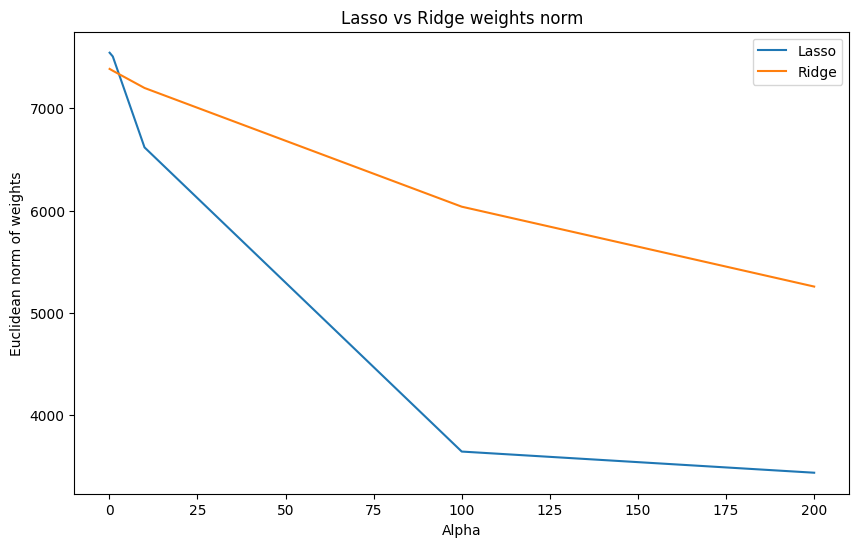

In [41]:
from sklearn.linear_model import Lasso, Ridge

alphas = [0.1, 1, 10, 100, 200]
norms_lasso = []
norms_ridge = []
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    ridge_reg = Ridge(alpha=alpha)

    lasso_reg.fit(X1_train, y1_train)
    ridge_reg.fit(X1_train, y1_train)

    norms_lasso.append(np.linalg.norm(lasso_reg.coef_))
    norms_ridge.append(np.linalg.norm(ridge_reg.coef_))

plt.figure(figsize=(10, 6))
plt.plot(alphas, norms_lasso, label='Lasso')
plt.plot(alphas, norms_ridge, label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Euclidean norm of weights')
plt.title('Lasso vs Ridge weights norm')
plt.legend()
plt.show()

Очевидно, что Ридж уменяшает веса давольно таки равномерно, поэтому нам более сложнее отобрать важные признаки, Лассо делает это более агрессивно!

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [43]:
from sklearn.linear_model import LassoCV
alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)
lasso_cv.fit(X1_train, y1_train)
mse_path = lasso_cv.mse_path_
average_mse = mse_path.mean(axis=1)
optimal_alpha = lasso_cv.alphas_[np.argmin(average_mse)]
print('Усредненные ошибки для каждого alpha:', *average_mse)
print('Оптимальное значение alpha:', optimal_alpha)
alphas_used = lasso_cv.alphas_
mse_df = pd.DataFrame({
    'alpha': alphas_used,
    'average_mse': average_mse
})
mse_df['average_mse'] = mse_df['average_mse'].apply(lambda x: f'{x:.5f}')
print(mse_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865922023.0176926, tolerance: 20328324.822429538
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5647940061.93625, tolerance: 20328324.822429538
  model = cd_fast.enet_coordinate_descent_gram(


Усредненные ошибки для каждого alpha: 2399642.800385283 2177545.563505245 1286507.4879887016 1283889.134853073 1400466.3392498721
Оптимальное значение alpha: 1.0
   alpha    average_mse
0  200.0  2399642.80039
1  100.0  2177545.56351
2   10.0  1286507.48799
3    1.0  1283889.13485
4    0.1  1400466.33925


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [44]:
optimal_alpha = 1
the_lasso = Lasso(alpha=optimal_alpha)
the_lasso.fit(X1_train, y1_train)
print('Коэффициенты Lasso-регрессии:', the_lasso.coef_)
feature_names = X1_train.columns
lasso_coefs = the_lasso.coef_
coefficients_data = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefs
})
coefficients_data
# по итогу наиболее информативными оказались караты, кат_айдиал, VVS1 и clarity_IF (чистота брюла), цвета
 # (смысл в качествах выбора, чем реже цвет, чище, дороже, больше, тем дороже)

Коэффициенты Lasso-регрессии: [ 5287.63312172   -93.23929368   -57.92040907 -1124.14167228
    26.00967164   -57.28292086  -666.05062462  -134.70531381
   111.42728009    31.19331443     0.           426.98644178
   239.05200788   158.36692046    -0.          -491.64095424
  -990.23609435 -1875.13139019 -4111.191454     870.7637865
  -708.2323775  -1648.99910286   208.15240466   -66.57098226
   596.2930647    583.14202583]


,Feature,Coefficient
0,carat,5287.633122
1,depth,-93.239294
2,table,-57.920409
3,x,-1124.141672
4,y,26.009672
5,z,-57.282921
6,cut_Fair,-666.050625
7,cut_Good,-134.705314
8,cut_Ideal,111.427280
9,cut_Premium,31.193314


Таким образом, наиболее информативными оказались carats, cut_ideal, clarity_VVS1 и clarity_IF (чистота брилианта), цвета
Следовательно, чем реже цвет, чище брилиант, тем дороже)

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [46]:
from sklearn.metrics import mean_squared_error

y1_pred_lasso = the_lasso.predict(X1_test)
mse_lasso = mean_squared_error(y1_test, y1_pred_lasso)

mse_linear_reg = mean_squared_error(y1_test, y1_test_prediction)

print('MSE Lasso-регрессии:', mse_lasso)
print('MSE обычной линейной регрессии:', mse_linear_reg)

better_model = 'Lasso' if mse_lasso < mse_linear_reg else 'обычная линейная регрессия'
print(f'Лучше использовать модель: {better_model}')

MSE Lasso-регрессии: 1300307.842573859
MSE обычной линейной регрессии: 1299384.20781588
Лучше использовать модель: обычная линейная регрессия


Вероятнее всего Лассо излишне успростил модель (вероятно еще OneHotCodding сыграл свою роль, т.к на эти веса мы не можем получить алекватную оценку)